# Assignment 1 -- ML4F 2021

## Instructions
* This assignment covers the material discussed in Lectures ML1 and ML2. 
* Each group submits _only one_ notebook via canvas on the assignment page. 
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors. 
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. To see how to set up your own repo for your group, see `L2-git-slides.pdf`.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Introduction

According to Wikipedia, the definition of a stock is: 
“Stock (also capital stock) is all of the shares into which ownership of a corporation is divided. In American English, the shares are collectively known as "stock". A single share of the stock represents fractional ownership of the corporation in proportion to the total number of shares.”
Some people trade with these stocks. But when is it worth to buy such one? What influence the prices of those stocks? In this assignment you will predict whether a stock is worth to buy or not. 
There are a lot of variables to choose from. The goal is to predict the column ‘class’. This is an indicator whether to buy the stock in the next period or not. 




Let's load and have a look at the data.

In [2]:
path = os.path.join('data','stocks.xlsx')

df_data = pd.read_excel(path)
df_data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,8.833000e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.000000e+00,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,1.700000e+04,1
3804,TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,1.132600e+07,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,4.839000e+06,0
3805,USATP,4.200000e+07,NaN,2.700000e+07,1.500000e+07,NaN,1.400000e+07,1.500000e+07,0.000000e+00,0.000000e+00,0.000000e+00,-2.700000e+07,0
3806,WSTG,3.407580e+08,0.1344,3.159480e+08,2.481000e+07,0.000000e+00,1.651300e+07,1.651300e+07,8.297000e+06,-4.720000e+05,8.758000e+06,2.998000e+06,1


## Preparation

Before we start the analysis, we prepare the data by labelling them correctly and splitting into targets and features.

In [3]:
target_name = 'Class'

# `sr_` prefix stands for a pandas Series
sr_targets = df_data.loc[:,target_name]

In [4]:
sr_targets.tail()

3803    1
3804    0
3805    0
3806    1
3807    0
Name: Class, dtype: int64

<AxesSubplot:xlabel='Gross Profit', ylabel='Class'>

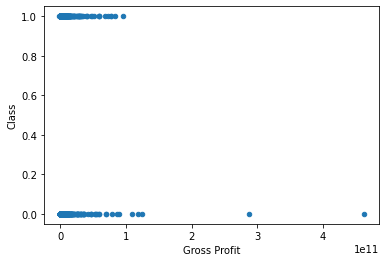

In [5]:
df_data.plot.scatter('Gross Profit','Class' )

# Question 1
(30 points)


As you learned in the lectures, preprocessing the data set is an important set to use machine learning models. Why is this important? 

Preprocessing the data set is important because it affects the ability of our model to learn. An optimization algorithm will focus on the weight of the feature with a very large range. The shape of the weights will determine the cost function, which will create a large elipse for features with a large range. Two common approaches to preprocess the data are normalization or standarization.

Use the methods discussed in ML2 to preprocess the data. Make descriptive statistics and histograms etc to find out more about the distributions of the data. Discuss your output: are there outliers etc? Then choose what preprocessing to apply.


In [6]:
# Answer

In [7]:
# Just creating basic statistic overview
stats = pd.DataFrame(df_data.describe(include='all'))
stats

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
count,3808,3.761000e+03,3.572000e+03,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.741000e+03,3.753000e+03,3.745000e+03,3.728000e+03,3.742000e+03,3808.000000
unique,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NATI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.918622e+18,-2.820193e+03,3.700973e+09,2.188214e+09,9.401830e+07,9.307406e+08,-5.999198e+26,6.748248e+08,1.002018e+08,5.725866e+08,1.762750e+08,0.429097
std,NaN,2.398954e+20,1.673319e+05,3.040688e+10,1.159028e+10,6.408912e+08,4.820928e+09,7.031507e+28,3.786291e+09,6.991091e+08,2.793740e+09,1.011342e+09,0.495012
min,NaN,-6.276160e+08,-1.000000e+07,-5.455740e+08,-1.105000e+09,-1.500000e+05,0.000000e+00,-3.948300e+30,-6.786000e+09,-2.250000e+08,-8.878000e+09,-2.081114e+09,0.000000
25%,NaN,5.793000e+07,-2.350000e-03,3.135714e+06,3.092900e+07,0.000000e+00,1.548900e+07,3.106600e+07,-1.308000e+06,0.000000e+00,-3.732902e+06,0.000000e+00,0.000000
50%,NaN,4.385430e+08,6.185000e-02,1.414420e+08,1.908760e+08,0.000000e+00,7.381800e+07,1.386820e+08,4.104400e+07,2.563000e+06,2.842700e+07,5.335000e+06,0.000000
75%,NaN,2.395500e+09,1.888750e-01,1.199844e+09,8.922534e+08,9.911000e+06,3.510000e+08,5.885100e+08,2.712980e+08,4.300000e+07,2.193835e+08,5.752550e+07,1.000000


array([[<AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Revenue Growth'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>],
       [<AxesSubplot:title={'center':'Gross Profit'}>,
        <AxesSubplot:title={'center':'R&D Expenses'}>,
        <AxesSubplot:title={'center':'SG&A Expense'}>],
       [<AxesSubplot:title={'center':'Operating Expenses'}>,
        <AxesSubplot:title={'center':'Operating Income'}>,
        <AxesSubplot:title={'center':'Interest Expense'}>],
       [<AxesSubplot:title={'center':'Earnings before Tax'}>,
        <AxesSubplot:title={'center':'Income Tax Expense'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

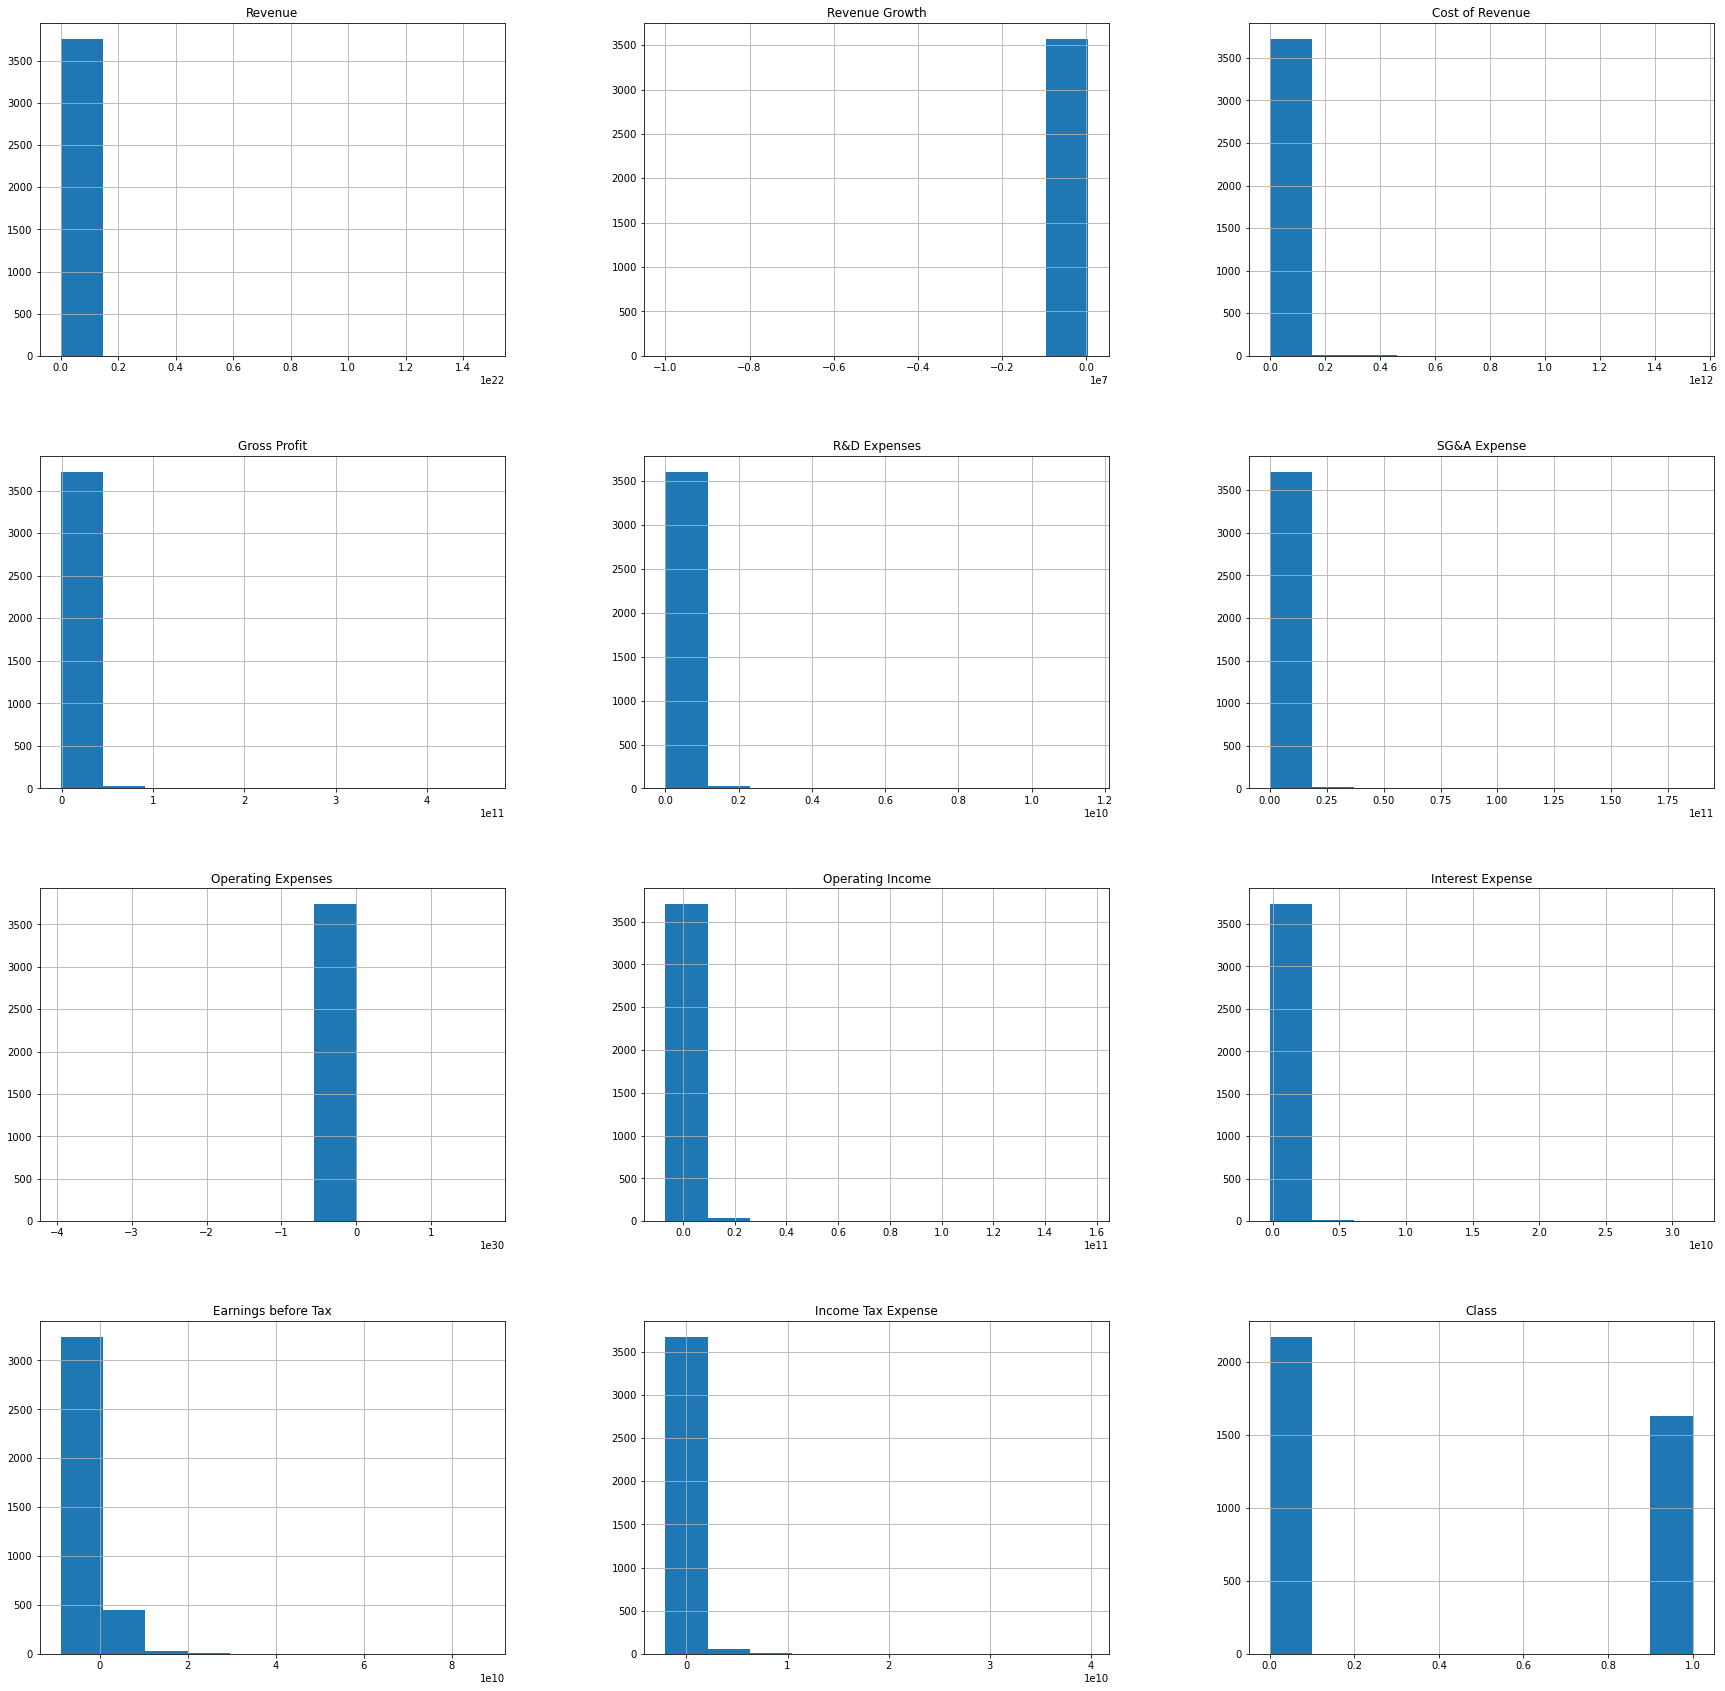

In [8]:
# Histograms of raw data
df_data.hist(figsize=(30,30))

- Since the values are very high, standardization is applied on all columns except for the 'Class' and 'Unnamed:0'. Using standardization, the values can be compared. 

In [9]:
# Below I took al the columns except for unnamed:0 and Class
df_x = df_data[["Revenue","Revenue Growth","Cost of Revenue","Gross Profit","R&D Expenses","SG&A Expense","Operating Expenses","Operating Income","Interest Expense","Earnings before Tax","Income Tax Expense"]]

In [10]:
# Here is did the standardization for these columns and replaced it in the existing dataframe
df_data[["Revenue","Revenue Growth","Cost of Revenue","Gross Profit","R&D Expenses","SG&A Expense","Operating Expenses","Operating Income","Interest Expense","Earnings before Tax","Income Tax Expense"]] = (df_x-df_x.mean())/df_x.std()

In [11]:
# Gave it a new name, don't know if this is really necessairy haha..
df_data_st = df_data

In [12]:
df_data_st

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
0,PG,-0.016335,0.016853,1.161876,2.862985,-0.146699,4.258570,0.008532,3.495552,0.870820,4.983074,2.644728,0
1,VIPS,-0.016335,0.016861,-0.029446,-0.108685,0.022331,-0.121678,0.008532,-0.142680,-0.125950,-0.142177,-0.135182,0
2,KR,-0.016335,0.016854,2.448032,1.557235,-0.146699,2.959028,0.008532,0.541473,0.490336,0.607577,0.568280,1
3,RAD,-0.016335,0.016854,0.476922,0.443089,-0.146699,1.167912,0.008532,0.016488,0.464004,-0.115390,-0.173503,1
4,GIS,-0.016335,0.016854,0.257798,0.360784,-0.146699,0.527608,0.008532,0.602853,0.289223,0.764249,0.699096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,TSRI,-0.016335,0.016855,-0.120358,-0.188083,-0.146699,-0.191351,0.008532,-0.178222,-0.143328,-0.204978,-0.174281,1
3804,TZOO,-0.016335,0.016853,-0.121084,-0.177230,-0.129027,-0.169724,0.008532,-0.173525,-0.143328,-0.198546,-0.169513,0
3805,USATP,-0.016335,NaN,-0.120827,-0.187503,NaN,-0.190159,0.008532,-0.178228,-0.143328,-0.204953,-0.200995,0
3806,WSTG,-0.016335,0.016855,-0.111324,-0.186657,-0.146699,-0.189637,0.008532,-0.176037,-0.144003,-0.201819,-0.171334,1


In [13]:
# The statistical overview of the standardized data
stats_standardized = pd.DataFrame(df_data_st.describe(include='all'))
stats_standardized

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
count,3808,3.761000e+03,3.572000e+03,3.734000e+03,3.756000e+03,3.672000e+03,3.749000e+03,3.741000e+03,3.753000e+03,3.745000e+03,3.728000e+03,3.742000e+03,3808.000000
unique,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NATI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-4.838868e-17,-1.165256e-17,3.637066e-17,2.912266e-17,4.965920e-16,1.639052e-16,7.814890e-16,3.680036e-17,2.071848e-16,9.081612e-17,-2.809529e-16,0.429097
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.495012
min,NaN,-1.633471e-02,-5.974465e+01,-1.396574e-01,-2.841360e-01,-1.469334e-01,-1.930625e-01,-5.614301e+01,-1.970484e+00,-4.651660e-01,-3.382772e+00,-2.232072e+00,0.000000
25%,NaN,-1.633471e-02,1.685388e-02,-1.216119e-01,-1.861289e-01,-1.466993e-01,-1.898497e-01,8.531881e-03,-1.785739e-01,-1.433279e-01,-2.062896e-01,-1.742981e-01,0.000000
50%,NaN,-1.633471e-02,1.685426e-02,-1.170633e-01,-1.723288e-01,-1.466993e-01,-1.777506e-01,8.531881e-03,-1.673883e-01,-1.396618e-01,-1.947782e-01,-1.690229e-01,0.000000
75%,NaN,-1.633471e-02,1.685502e-02,-8.225536e-02,-1.118145e-01,-1.312349e-01,-1.202550e-01,8.531881e-03,-1.065758e-01,-8.182099e-02,-1.264266e-01,-1.174177e-01,1.000000


array([[<AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Revenue Growth'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>],
       [<AxesSubplot:title={'center':'Gross Profit'}>,
        <AxesSubplot:title={'center':'R&D Expenses'}>,
        <AxesSubplot:title={'center':'SG&A Expense'}>],
       [<AxesSubplot:title={'center':'Operating Expenses'}>,
        <AxesSubplot:title={'center':'Operating Income'}>,
        <AxesSubplot:title={'center':'Interest Expense'}>],
       [<AxesSubplot:title={'center':'Earnings before Tax'}>,
        <AxesSubplot:title={'center':'Income Tax Expense'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

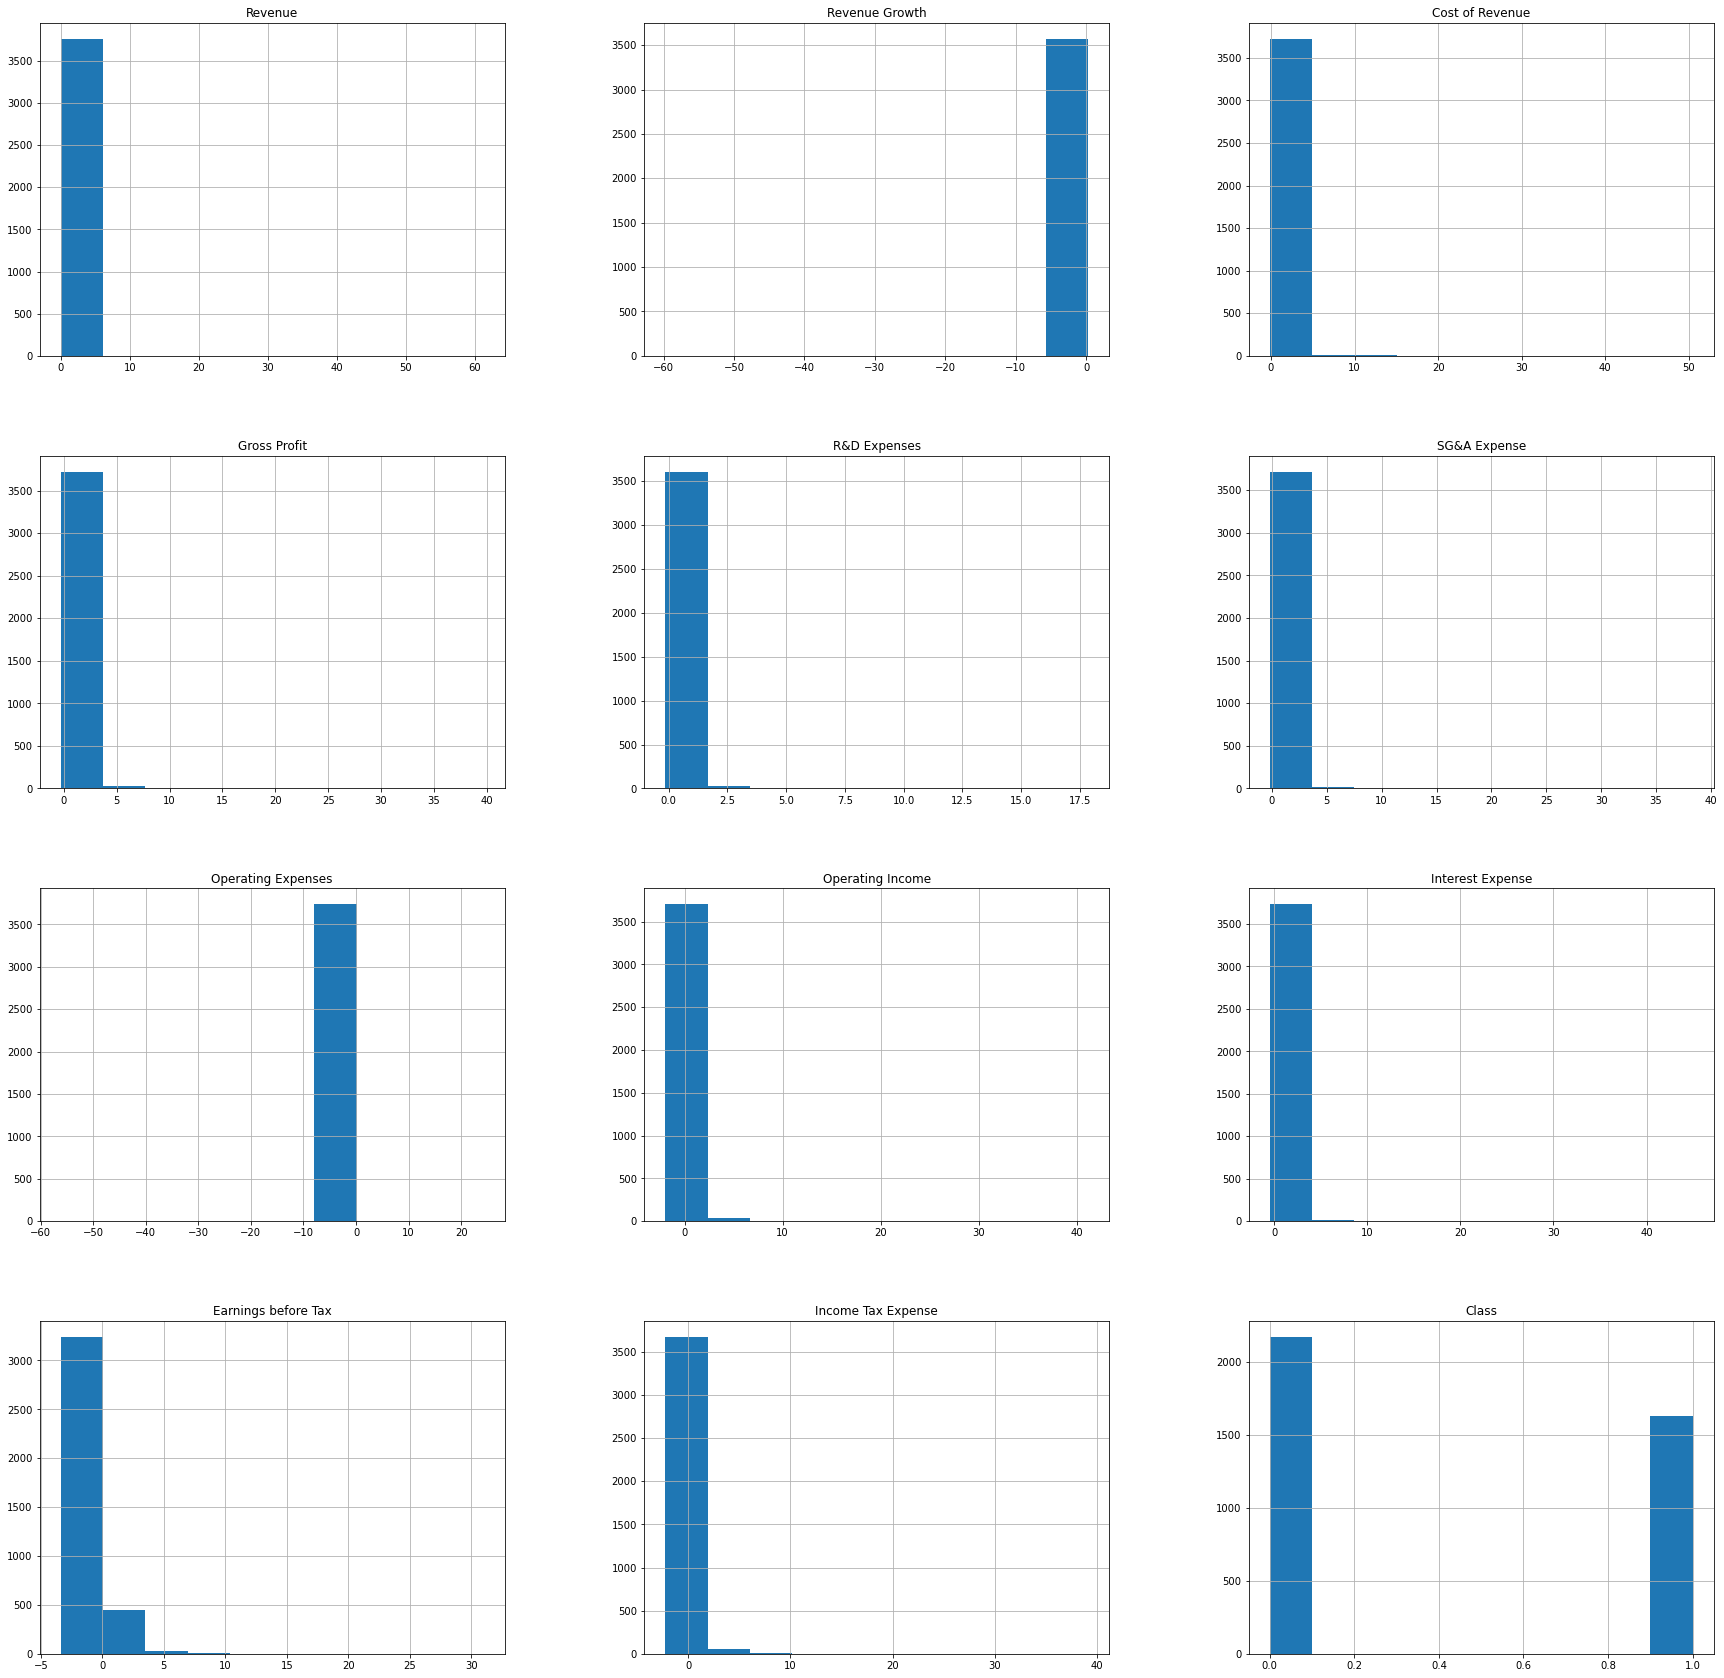

In [14]:
# Histograms of the standardized data, still the same because of the outliers but now on a comparable scale
df_data_st.hist(figsize=(30,30))

In [15]:
# Found the followin part on the internet. I think it winsorizes a column in using_mstats
# Then it applies this to all the columns in using_mstats_df.

In [16]:
def using_mstats_df(df):
    return df.apply(using_mstats, axis=0)

def using_mstats(s):
    return mstats.winsorize(s, limits=[0.1, 0.1])

In [17]:
df_data_st_w = using_mstats_df(df_data_st)

In [18]:
df_data_st_w

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
0,PG,-0.016335,0.016853,0.116257,0.184330,-0.146699,0.171756,0.008532,0.236161,0.181534,0.326950,0.213306,0
1,TSC,-0.016335,0.016861,-0.029446,-0.108685,0.022331,-0.121678,0.008532,-0.142680,-0.125950,-0.142177,-0.135182,0
2,KR,-0.016335,0.016854,0.116257,0.184330,-0.146699,0.171756,0.008532,0.236161,0.181534,0.326950,0.213306,1
3,RAD,-0.016335,0.016854,0.116257,0.184330,-0.146699,0.171756,0.008532,0.016488,0.181534,-0.115390,-0.173503,1
4,GIS,-0.016335,0.016854,0.116257,0.184330,-0.146699,0.171756,0.008532,0.236161,0.181534,0.326950,0.213306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,TSC,-0.016335,0.016855,-0.120358,-0.188083,-0.146699,-0.191351,0.008532,-0.178222,-0.143328,-0.204978,-0.174281,1
3804,TSC,-0.016335,0.016853,-0.121084,-0.177230,-0.129027,-0.169724,0.008532,-0.173525,-0.143328,-0.198546,-0.169513,0
3805,TSC,-0.016335,0.016861,-0.120827,-0.187503,0.048342,-0.190159,0.008532,-0.178228,-0.143328,-0.204953,-0.174777,0
3806,TSC,-0.016335,0.016855,-0.111324,-0.186657,-0.146699,-0.189637,0.008532,-0.176037,-0.143328,-0.201819,-0.171334,1


In [19]:
# Basic statistics of standardized and then windsorized dataset
stats_standardized_w = pd.DataFrame(df_data_st_w.describe(include='all'))
stats_standardized_w

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
count,3808,3.808000e+03,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3.808000e+03,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000
unique,3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TSC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.633471e-02,0.016855,-0.077038,-0.112561,-0.115520,-0.118896,8.531881e-03,-0.100676,-0.081202,-0.108837,-0.103618,0.429097
std,NaN,1.640775e-11,0.000002,0.076463,0.119451,0.062209,0.116674,8.535960e-16,0.133363,0.105892,0.171871,0.125579,0.495012
min,NaN,-1.633471e-02,0.016853,-0.121715,-0.188527,-0.146699,-0.192026,8.531881e-03,-0.184717,-0.143328,-0.216352,-0.174777,0.000000
25%,NaN,-1.633471e-02,0.016854,-0.121592,-0.186050,-0.146699,-0.189793,8.531881e-03,-0.178485,-0.143328,-0.206064,-0.174298,0.000000
50%,NaN,-1.633471e-02,0.016854,-0.116543,-0.171569,-0.146699,-0.176897,8.531881e-03,-0.166541,-0.139169,-0.193718,-0.168441,0.000000
75%,NaN,-1.633471e-02,0.016855,-0.077995,-0.106954,-0.124184,-0.113388,8.531881e-03,-0.100632,-0.074994,-0.113761,-0.109373,1.000000


array([[<AxesSubplot:title={'center':'Revenue'}>,
        <AxesSubplot:title={'center':'Revenue Growth'}>,
        <AxesSubplot:title={'center':'Cost of Revenue'}>],
       [<AxesSubplot:title={'center':'Gross Profit'}>,
        <AxesSubplot:title={'center':'R&D Expenses'}>,
        <AxesSubplot:title={'center':'SG&A Expense'}>],
       [<AxesSubplot:title={'center':'Operating Expenses'}>,
        <AxesSubplot:title={'center':'Operating Income'}>,
        <AxesSubplot:title={'center':'Interest Expense'}>],
       [<AxesSubplot:title={'center':'Earnings before Tax'}>,
        <AxesSubplot:title={'center':'Income Tax Expense'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

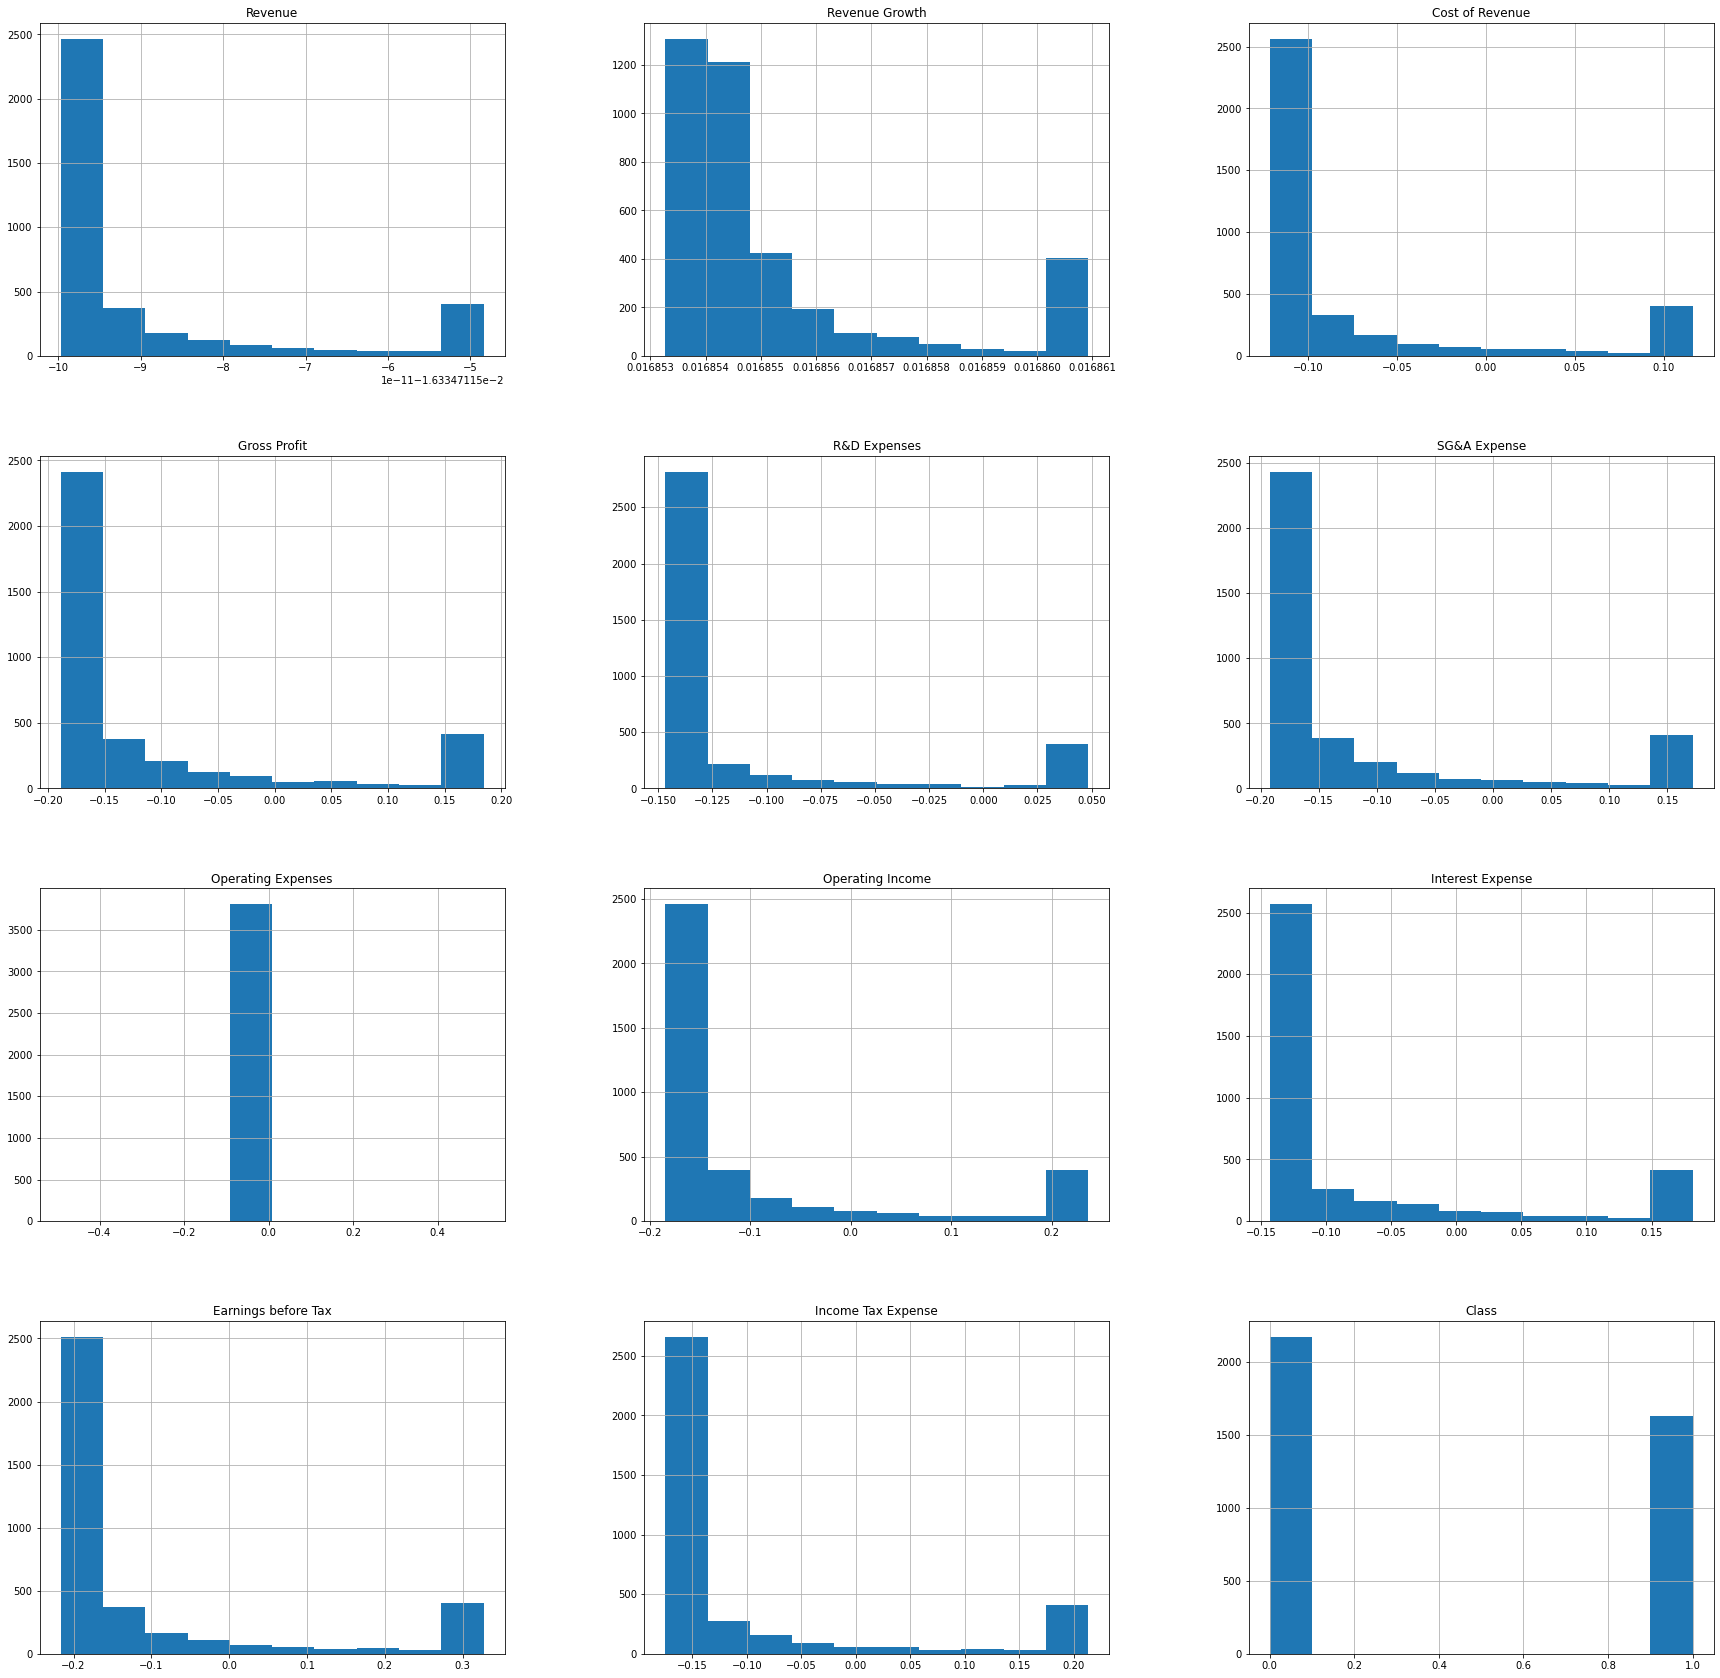

In [20]:
# Histograms of standardized and windsorized data
df_data_st_w.hist(figsize=(30,30))

There are definitely outliers in the dataset. The dataset is first standardized and then winsorized.

Which features will you use to make your predictions? Looking at a correlation matrix might help: df_date.corr gives a correlation matrix of the dataframe. Other feature selection approaches are also fine. Explain your choices.  

In [21]:
corr_matrix = df_data_st_w.corr()
corr_matrix.round(decimals=4)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
Revenue,1.0000,-0.0387,0.8715,0.8814,0.2512,0.7928,NaN,0.8381,0.6495,0.8056,0.7932,-0.0072
Revenue Growth,-0.0387,1.0000,0.0297,-0.0232,0.2443,-0.0151,NaN,-0.0038,0.0511,0.0480,0.0149,0.0323
Cost of Revenue,0.8715,0.0297,1.0000,0.7325,0.3029,0.6646,NaN,0.7010,0.6522,0.6859,0.6853,-0.0172
Gross Profit,0.8814,-0.0232,0.7325,1.0000,0.2892,0.8483,NaN,0.8987,0.6642,0.8611,0.8329,0.0125
R&D Expenses,0.2512,0.2443,0.3029,0.2892,1.0000,0.2824,NaN,0.2600,0.2197,0.3108,0.2572,0.0316
SG&A Expense,0.7928,-0.0151,0.6646,0.8483,0.2824,1.0000,NaN,0.7170,0.4971,0.7085,0.7195,0.0430
Operating Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operating Income,0.8381,-0.0038,0.7010,0.8987,0.2600,0.7170,NaN,1.0000,0.6666,0.9345,0.8786,0.0005
Interest Expense,0.6495,0.0511,0.6522,0.6642,0.2197,0.4971,NaN,0.6666,1.0000,0.5890,0.5507,-0.0316
Earnings before Tax,0.8056,0.0480,0.6859,0.8611,0.3108,0.7085,NaN,0.9345,0.5890,1.0000,0.8899,0.0098


- #Some answer in text which features you are going to use to make predictions
We want to predict class so we would take the one with the highest or lowest correlation(?) at least as far away from zero as possible(?). SG&A Expense, Revenue Growth, R&D expense, Interest Expense

Why should you make a training and a test set?

- We create a model and optimize the algorithm based on a training set. However, the model could be biased towards the training set and does not work on other data sets. Therefore, we use a test set on the created model, which is based on the training set, to get a unbiased evaluation of that the model.

Make a training and test set. Describe briefly what parameters these sets have: how many observations in both sets?

- We need to split the data in 80/20 where 80% is the training set and 20% is the test set.

In [22]:
# Found this on the internet too. It should split it in 80/20.
# I think we first have to exclude some variables(features) we are not going to use and then do this. But for now it works
training_data, testing_data = train_test_split(df_data_st_w, test_size=0.2, random_state=25)

In [23]:
training_data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
982,SSY,-0.016335,0.016853,-0.120740,-0.184990,-0.146699,-0.184369,0.008532,-0.177953,-0.141978,-0.204955,-0.173763,0
3400,TIVO,-0.016335,0.016861,-0.118188,-0.151261,0.019682,-0.164261,0.008532,-0.156120,-0.064988,-0.216352,-0.154794,0
2463,MARPS,-0.016335,0.016854,-0.121715,-0.188527,-0.146699,-0.192026,0.008532,-0.177485,-0.143328,-0.203946,-0.174298,0
3188,CPK,-0.016335,0.016855,-0.108888,-0.179409,-0.146699,-0.192026,0.008532,-0.161780,-0.129765,-0.183464,-0.150622,1
3552,NATI,-0.016335,0.016854,-0.111252,-0.108926,0.048342,-0.078332,0.008532,-0.139883,-0.143328,-0.153409,-0.156828,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,CDW,-0.016335,0.016855,0.116257,-0.023029,-0.146699,0.065871,0.008532,-0.000482,0.138888,-0.066179,-0.033100,1
2191,IRDM,-0.016335,0.016854,-0.117879,-0.163612,-0.119258,-0.176751,0.008532,-0.145766,-0.143328,-0.163270,-0.133300,0
2522,SLM,-0.016335,0.016854,-0.121715,-0.132696,-0.146699,-0.166157,0.008532,-0.090081,-0.143328,-0.085334,-0.035901,0
318,MTX,-0.016335,0.016858,-0.079304,-0.151231,-0.108627,-0.155269,0.008532,-0.133647,-0.083537,-0.160855,-0.143843,0


In [24]:
testing_data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Class
2011,SKT,-0.016335,0.016854,-0.117196,-0.164541,-0.146699,-0.183838,0.008532,-0.143402,-0.060464,-0.178462,-0.174298,0
2893,BCBP,-0.016335,0.016854,-0.121715,-0.184393,-0.146699,-0.187335,0.008532,-0.174891,-0.143328,-0.200430,-0.169308,0
1665,SFL,-0.016335,0.016855,-0.117786,-0.170850,-0.146699,-0.191484,0.008532,-0.139894,-0.020198,-0.160993,-0.174298,1
3420,TSC,-0.016335,0.016854,-0.084519,-0.172000,-0.146699,-0.164454,0.008532,-0.165937,-0.108954,-0.196974,-0.166785,0
3271,IT,-0.016335,0.016855,-0.095473,-0.083234,-0.146699,-0.011341,0.008532,-0.102650,-0.125734,-0.106633,-0.084401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,BBGI,-0.016335,0.016856,-0.119506,-0.180158,-0.110511,-0.182287,0.008532,-0.172682,-0.143047,-0.197680,-0.167558,0
1945,TSC,-0.016335,0.016857,-0.113592,-0.187770,-0.146699,-0.189103,0.008532,-0.181000,-0.139556,-0.206934,-0.174286,0
695,GNMK,-0.016335,0.016855,-0.121283,-0.187290,-0.097045,-0.187939,0.008532,-0.184717,-0.143299,-0.216352,-0.174777,0
607,CRBP,-0.016335,0.016854,-0.121715,-0.188527,-0.144740,-0.192026,0.008532,-0.178928,-0.143293,-0.205863,-0.174298,0


In [25]:
#Also saw this on intertnet --> i'll try and use this but we will discuss tomorrow :)

In [26]:
#using_columns= ['Interest Expense','R&D Expenses','Revenue Growth','SG&A Expense','Revenue']
using_columns= ['Operating Income','R&D Expenses','Revenue Growth','SG&A Expense','Revenue']
x=df_data_st_w[using_columns]
y=df_data_st_w.Class

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [28]:
x_train

,Operating Income,R&D Expenses,Revenue Growth,SG&A Expense,Revenue
982,-0.177953,-0.146699,0.016853,-0.184369,-0.016335
3400,-0.156120,0.019682,0.016861,-0.164261,-0.016335
2463,-0.177485,-0.146699,0.016854,-0.192026,-0.016335
3188,-0.161780,-0.146699,0.016855,-0.192026,-0.016335
3552,-0.139883,0.048342,0.016854,-0.078332,-0.016335
...,...,...,...,...,...
3389,-0.000482,-0.146699,0.016855,0.065871,-0.016335
2191,-0.145766,-0.119258,0.016854,-0.176751,-0.016335
2522,-0.090081,-0.146699,0.016854,-0.166157,-0.016335
318,-0.133647,-0.108627,0.016858,-0.155269,-0.016335


In [29]:
y_train

982     0
3400    0
2463    0
3188    1
3552    0
       ..
3389    1
2191    0
2522    0
318     0
1156    0
Name: Class, Length: 3046, dtype: int64

# Question 2
(10 points)

Estimate a Logistic regression model with the target variable 'class'. Use the User Guide of Scikit-learn for the syntax and the training set of the previous question. What are the estimated coefficients? 

In [30]:
#Not sure if i am doing this correct?? hahah no clue 

In [31]:
logit_model=LogisticRegression().fit(x_train,y_train)


In [32]:
#x=np.array(training_data.Revenue)
#x=np.array(training_data['SG&A Expense'] )
#x=np.array(training_data['Revenue Growth'] )
#x=np.array(training_data['Cost of Revenue'] )
#x=np.array(training_data['Gross Profit'] )
#x=np.array(training_data['R&D Expenses'] )

#y=np.array(training_data.Class)

In [33]:
#x_reshape=x.reshape(-1,1)

In [34]:
#model.fit(x_train,y_train)

In [35]:
logit_model.intercept_

array([-0.14933224])

In [36]:
logit_model.coef_

array([[-8.53848638e-01,  4.10653723e-01, -7.85802452e-04,
         1.31362108e+00,  8.08848288e-04]])

In [37]:
logit_model.score(x_train,y_train)

0.5633617859487853

In [38]:
y_pred=logit_model.predict(x_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[435,  15],
       [305,   7]])

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

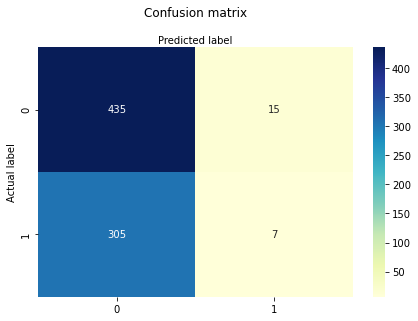

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

---

# Question 3
(30 points)

Make predictions for the test set. 

In [43]:
# Answer

Discuss the results in terms of investment advice: would you put your money on your algorithm?

In [44]:
# Answer

Feature engineering can also be helpful to make better predictions. Define at least 2 new features with the features given in the dataset. 


In [45]:
# Answer

Use the new features and rerun the classification. Does the new features improve the predictions? Is it possible that it does worse? Please explain.

In [46]:
# Answer

# Question 4
(10 points)

Run the same model as in the previous question but set the tolerance for stopping criteria on 0.01 instead of the default one of 1e-4. Discuss these results in relation to the default: what is different? Why?

In [47]:
# Answer

# Question 5
(20 points)

Compute the confusion matrix of the model estimated in Question 4.  
Compute precision and recall for this case.

In [48]:
# Answer

In [49]:
# Answer

---